In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

Возьмем датасет [отсюда](https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset).

In [2]:
df = pd.read_csv("./data/framingham.csv")

In [8]:
# посмотрим на sample датасета
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [9]:
# посмотрим на признаки и инфу о них
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
# посмотрим, есть ли пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
df['education'].isna().sum()

105

In [14]:
df['cigsPerDay'].isna().sum()

29

In [15]:
df['BPMeds'].isna().sum()

53

In [17]:
df = df[~df.education.isna()]

In [18]:
df = df[~df['education'].isna()]

In [19]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [20]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [21]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [ ]:
# что будем делать с NaN-ами?
# что вообще можно с ними делать? (3 варианта)

/home/francuz-v/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/francuz-v/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


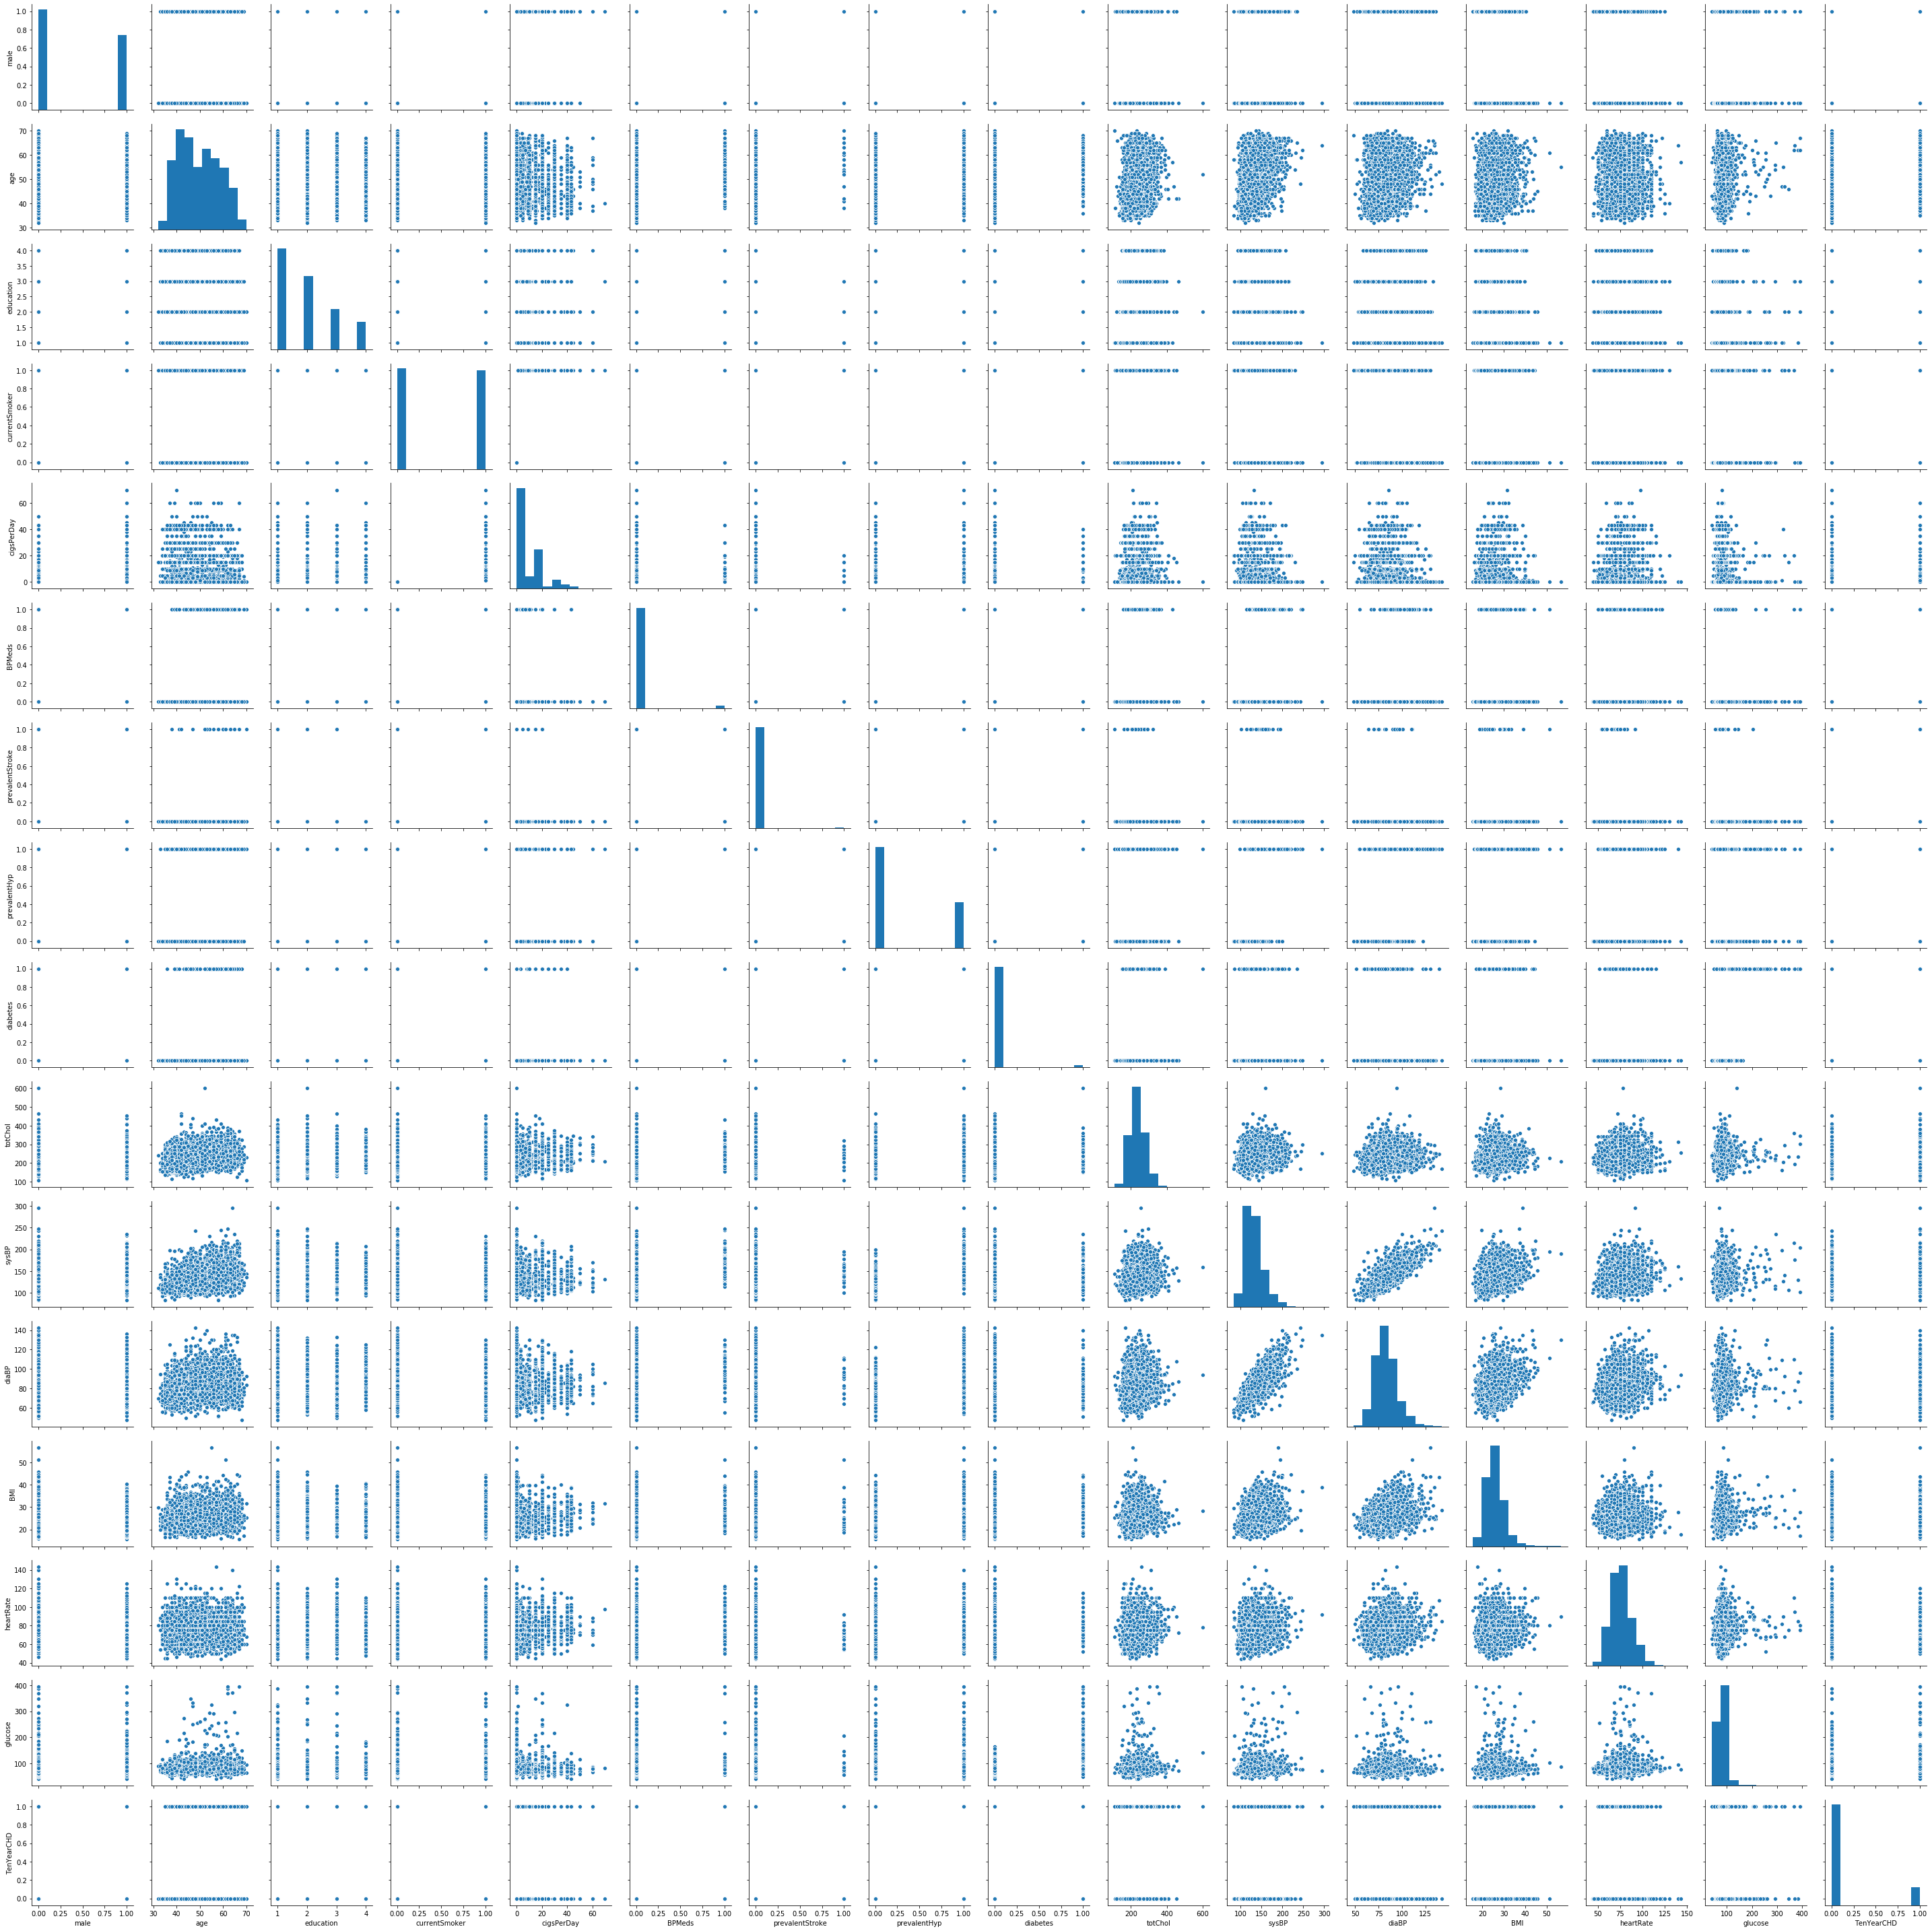

In [22]:
# посмотрим на распределения значений признаков (и таргета)
sns.pairplot(df)

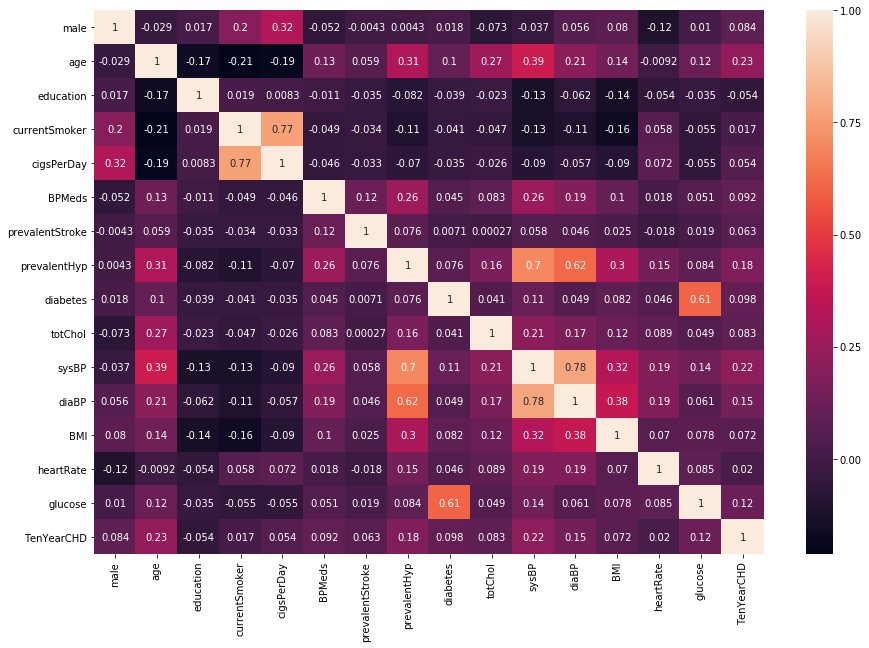

In [24]:
# посмотрим на корреляцию между признаками
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
# посмотрим на "взаимодействия" признаков

In [25]:
df = df.drop(['currentSmoker', 'sysBP'], axis=1)

In [27]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0,0


In [ ]:
# что такое boxplot?
# посмотрим на него (них)

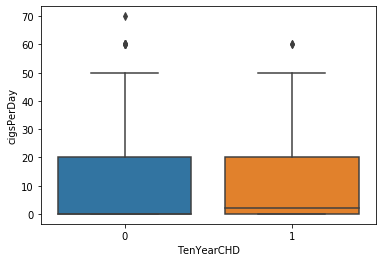

In [29]:
sns.boxplot(x=df['TenYearCHD'], y=df['cigsPerDay'])

In [ ]:
# выполним нормализацию (зачем она, кстати, нужна)?

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['TenYearCHD'], axis=1), df['TenYearCHD'], test_size=0.33, random_state=42)

In [35]:
encoder = OneHotEncoder()

In [39]:
pd.concat([
    pd.DataFrame(encoder.fit_transform(df['education'].values.reshape(-1,1)).todense())
])

/home/francuz-v/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0


In [ ]:
encoder = OneHotEncoder()

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm

In [ ]:
# разделим данные на train и test

In [60]:
_coef = int(len(df[df['TenYearCHD'] == 0]) / len(df[df['TenYearCHD'] == 1]))
print(_coef)

model = lightgbm.LGBMClassifier()

5


In [61]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
model.score(x_test, y_test)

0.8278388278388278

In [63]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1139
           1       0.27      0.25      0.26       226

    accuracy                           0.76      1365
   macro avg       0.56      0.56      0.56      1365
weighted avg       0.76      0.76      0.76      1365



In [ ]:
# поработаем с категориальными признаками

In [ ]:
# обучим модель

In [ ]:
# оценим качество